# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

nf-core/differentialabundance

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [10]:
!nextflow run nf-core/differentialabundance \
    -profile rnaseq,docker \
    --input samplesheet.csv \
    --contrasts data/contrasts.csv \
    --matrix data/salmon.merged.gene_counts.tsv \
    --genome GRCm38 \
    --outdir differentialexpression-out  \
    --max_memory '6.GB' \
    -r 1.5.0 \
    -resume


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [kickass_allen] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : kickass_allen
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /Users/sophiag/Documents/Dokumente/S

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

!nextflow run nf-core/differentialabundance \       specifies nf-core/rnaseq pipeline. 
    -profile rnaseq,docker \                        uses Docker containers so the exact software versions are reproducible.  
    --input samplesheet.csv \                       specifies the samples we look at and the applied condition.
    --contrasts data/contrasts.csv \                specifies what we compare to each other.
    --matrix data/salmon.merged.gene_counts.tsv \   specifies the output of rnaseq, here is the gene abundance encoded.
    --genome GRCm38 \                               the selected genome. Here: mus musculus. 
    --outdir differentialexpression-out  \          this is the specified output path.
    --max_memory '6.GB' \                           specifies max_memory because local resources were limited.
    -r 1.5.0 \                                      specifies version.
    -resume                                         resume if interrupted so we can save time and resources in subsequent runs.


What were the outputs of the pipeline?

in the created output folder there were saved pipeline_info, plots, report, shinyngs_app and tables. The report is a html which can be viewed in the browser of your choice.

Would you exclude any samples? If yes, which and why?

some samples were automatically excluded due to their low abundance. 
From the report: "Input was a matrix of 45706 genes for 16 samples, reduced to 26881 genes after filtering for low abundance."

Moreover reasons to exclude samples could be low quality as (in theory) explored in rna seq. Runs with very high rRNA contamination, extreme duplication, low mapping rate, severe GC bias, could be reasonable to exclude to not mess with the results

Looking at the (transcript) counts per gene look quite stable. So looking at the abundance value distribution I would decide to not exclude any samples. Only SNI_Sal_4 and SNI_Sal_2 show a divergent behavior in PCA with higher values compared to all other samples. Still with a sample size of four this is hard to decide whether this behaviour points to a meaningful biological function.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

In SNI_oxy versus SNI_Sal there were 1 gene upregulated (higher in SNI_oxy) and 17 downregulated (in SNI_oxy compared to SNI_Sal).
In Sham_oxy versus Sham_Sal there were 7 genes upregulated (higher in Sham_oxy) and 0 downregulated. The paper in contrast found 584 genes in the VTA that were differentially expressed in Sham_oxy compared to Sham-Sal.

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

Nucleus Accumbens (NAc):
- Part of the ventral striatum, located deep in the forebrain.
- role in reward, motivation, and reinforcement learning.
- Receives dopaminergic input from the ventral tegmental area (VTA) and glutamatergic input from the prefrontal cortex.
- Strongly implicated in addiction and drug withdrawal processes.

Medial Prefrontal Cortex (mPFC):
- Frontal lobe region involved in executive functions, decision-making, working memory, and emotional regulation.
- Integrates information from limbic regions and exerts top-down control over reward and stress responses.
- In addiction, the mPFC is often linked to craving, relapse, and maladaptive decision-making.

Ventral Tegmental Area (VTA):
- Located in the midbrain.
- Houses dopamine-producing neurons that project to the NAc, mPFC, and other limbic areas.
- Central to the mesolimbic dopamine pathway, which regulates reward, reinforcement, and motivation.
- Drugs of abuse, including opioids, strongly influence VTA activity.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

No, not really. NAc, mPFC, and VTA are anatomical regions, not gene-defined entities. It only provides RNA-seq data per dissected region, from which we could extract all expressed genes and region-specific differential expression.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No, this would not be sufficient. A raw gene list doesn’t tell biologists what the changes mean biologically. The publication goes further by analyzing pathways, upstream regulators, and linking the transcriptional changes to functional consequences in opioid withdrawal and neuropathic pain.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

In [11]:
!nextflow run nf-core/differentialabundance \
    -profile rnaseq,docker \
    --input samplesheet.csv \
    --contrasts data/contrasts_run2.csv \
    --matrix data/salmon.merged.gene_counts.tsv \
    --genome GRCm38 \
    --outdir differentialexpression_run2-out  \
    --max_memory '6.GB' \
    -r 1.5.0 \
    -resume


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [grave_swartz] DSL2 - revision: 3dd360fed0 [1.5.0]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : 1.5.0
  runName                     : grave_swartz
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /Users/sophiag/Documents/Dokumente/Stu

SNI-oxy vs Sham-sal: 1 genes
Sham-oxy vs Sham-sal: 7 genes
SNI-sal vs Sham-sal: 74 genes


/Users/sophiag/miniconda3/envs/cw_course/lib/python3.13/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


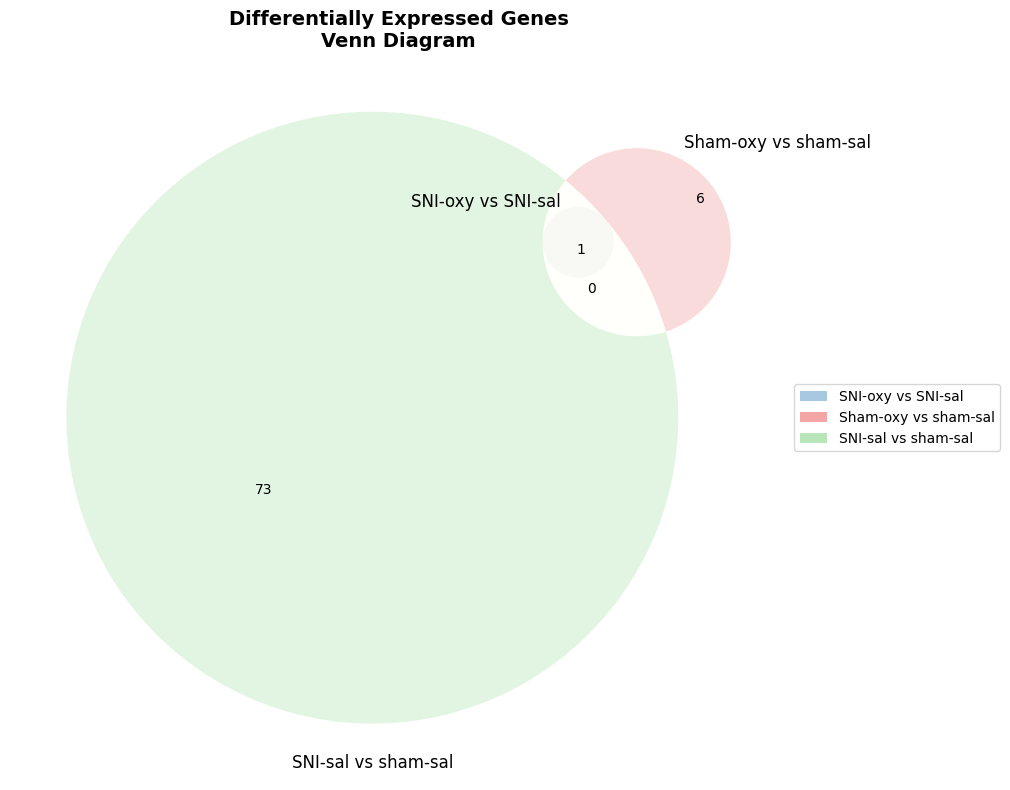


Detailed overlap statistics:
SNI-oxy only: 0
Sham-oxy only: 6
SNI-sal only: 73
SNI-oxy ∩ Sham-oxy: 0
SNI-oxy ∩ SNI-sal: 0
Sham-oxy ∩ SNI-sal: 0
All three: 1


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Read the filtered differential expression results files
sni_oxy_vs_sham_sal = pd.read_csv('differentialexpression_run2-out/tables/differential/sni_oxy_vs_sham_sal.deseq2.results_filtered.tsv', sep='\t')
sham_oxy_vs_sham_sal = pd.read_csv('differentialexpression_run2-out/tables/differential/sham_oxy_vs_sham_sal.deseq2.results_filtered.tsv', sep='\t')  
sni_sal_vs_sham_sal = pd.read_csv('differentialexpression_run2-out/tables/differential/sni_sal_vs_sham_sal.deseq2.results_filtered.tsv', sep='\t')

# Extract gene sets (using gene_id column)
set_sni_oxy = set(sni_oxy_vs_sham_sal['gene_id'])
set_sham_oxy = set(sham_oxy_vs_sham_sal['gene_id']) 
set_sni_sal = set(sni_sal_vs_sham_sal['gene_id'])

print(f"SNI-oxy vs Sham-sal: {len(set_sni_oxy)} genes")
print(f"Sham-oxy vs Sham-sal: {len(set_sham_oxy)} genes")
print(f"SNI-sal vs Sham-sal: {len(set_sni_sal)} genes")

# Create the Venn diagram
plt.figure(figsize=(10, 8))

venn = venn3(
    [set_sni_oxy, set_sham_oxy, set_sni_sal],
    set_labels=('SNI-oxy vs SNI-sal', 'Sham-oxy vs sham-sal', 'SNI-sal vs sham-sal'),
    set_colors=('#A8C8E1', '#F4A6A6', '#B8E6B8')  # Blue, Red, Green to match your image
)

# Customize the appearance
plt.title('Differentially Expressed Genes\nVenn Diagram', fontsize=14, fontweight='bold')

# Add a legend matching your image
legend_elements = [
    plt.Rectangle((0,0),1,1, facecolor='#A8C8E1', label='SNI-oxy vs SNI-sal'),
    plt.Rectangle((0,0),1,1, facecolor='#F4A6A6', label='Sham-oxy vs sham-sal'),
    plt.Rectangle((0,0),1,1, facecolor='#B8E6B8', label='SNI-sal vs sham-sal')
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()